In [21]:
import pandas as pd
import dateutil
import time
import matplotlib.pyplot as plt
import math
import numpy as np
MAXIMO_BEST = 2000
MAXIMO = 2000

cargar data

In [2]:
data_january = pd.read_csv("./data/enero2.csv", sep=',')
#data_january = pd.read_csv('data/1januarynew.csv', header=0, sep=',')

Cantidad Datos

In [3]:
data_january.shape[0]

999999

Conversion de datos

In [4]:
data_january['pickup_datetime'] = data_january['pickup_datetime'].apply(dateutil.parser.parse)
data_january['dropoff_datetime'] = data_january['dropoff_datetime'].apply(dateutil.parser.parse)

In [5]:
data_january.dropna(inplace=True)
data_january.reset_index(drop=True, inplace=True)

# A que se quiere llegar con todo este analisis?

## Análisis Básico

Taxi_jan  & untitled1

### Horas vs Pickups
* porque hacer esto?
* graficas por cada dia de la semana
* graficas todos los dias de la semana en el mismo grafico

__2 graficas__

### Horas vs Fare amount
* porque hacer esto?
* que es el fare amount?
* graficas por dia de la semana independiente
* verificar porque de esos picos y llegar un una conclusion

__1 grafica__

__importante conclusion y limpieza de datos__

### Horas vs Trip amount
* porque hacer esto?
* que es el trip amount?
* graficas por dia de la semana independiente
* verificar porque de esos picos y llegar un una conclusion

__1 grafica__

__importante conclusion y limpieza de datos__

### Horas vs Trip distance
* porque hacer esto?
* que es el trip distance?
* graficas por dia de la semana independiente
* verificar porque de esos picos y llegar un una conclusion del porque 

__1 grafica__

__importante conclusion y limpieza de datos__

## Analisis de Neighborhoods

* que son lo Neighborhoods
* como lo sacamos y ejemplo en google maps con el punto lat y long
* para que lo usaremos
* a que queremos llegar haciendo esto
* que conclusion llegamos haciendo este analisis
* heatmap de boroughs

### Analisis Neighborhoods  pickups
* Neighborhoods con mayor cantidad de pickups (grafica)

### Analisis Neighborhoods  dropoffs
* Neighborhoods con mayor cantidad de dropoffs (grafica)

### Analisis de escogiendo los mayores Neighborhoods a donde son sus dropoff y pickups comunmente
* grafico de los Neighborhoods de las 5 primeros de cada dropoff y pickups

### Pickups de zonas por rango de horario(dia, tarde noche)
* los rangos horarios se escoge de acuerdo a los primeros graficos (porque?)
* para que hacemos este analisis

## Analisis de grids
* porque escogimos manhattan? (grafico de todos los puntos lat,long en un mapa para verificar la densidad de pickups y dropoffs)
* porque
* para que
* que queremos obtener con esto
* como lo haremos

__extra__

* mapa de grids en manhattan
* mapa de 

## Analisis 
* 4,5
* 7,6


In [6]:
#filtrar solo los pickups de Manhattan
def insideManhattan(x):
    lat =  x['pickup_latitude']
    long = x['pickup_longitude']
    if ((lat > 40.680396 and lat <40.882214) and (long > -74.047285 and long < -73.907000)):
        return True
    return False

def setPick(x):
    stepLatitude =   cellSize *1.1* 180/(math.pi * R)
    stepLongitude =  cellSize *0.9*180 /( R* math.cos(math.pi*south_lat/180) * math.pi )
    lat =  x['pickup_latitude']
    lon = x['pickup_longitude']
    i = int(math.trunc((lat - south_lat) / stepLatitude))
    j = int(math.trunc((lon - weast_lon) / stepLongitude))
    return '{},{}'.format(i,j)

def setDrop(x):
    stepLatitude =   cellSize *1.1* 180/(math.pi * R)
    stepLongitude =  cellSize *0.9*180 /( R* math.cos(math.pi*south_lat/180) * math.pi )
    lat =  x['dropoff_latitude']
    lon = x['dropoff_longitude']
    i = int(math.trunc((lat - south_lat) / stepLatitude))
    j = int(math.trunc((lon - weast_lon) / stepLongitude))
    return '{},{}'.format(i,j)

In [9]:
boxes_file = pd.read_csv('boxes2.txt')

In [10]:
data_january_manhattan = data_january.copy()
data_january_manhattan = data_january_manhattan[data_january_manhattan.apply(insideManhattan, axis=1)]
data_january_manhattan.reset_index(inplace=True)

In [11]:
data_january_manhattan['pickups_place'] = -1
data_january_manhattan['dropoff_place'] = -1
R = 6378137
cellSize = 1000
south_lat = 40.680396
weast_lon = -74.047285

In [12]:
data_january_manhattan['pickups_place'] = data_january_manhattan.apply(setPick, axis=1)
data_january_manhattan['dropoff_place'] = data_january_manhattan.apply(setDrop, axis=1)
data_january_manhattan

,index,pickup_datetime,pickup_latitude,pickup_longitude,trip_distance,passenger_count,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,tolls_amount,taxes_amount,tip_amount,payment_amount,payment_type,pickup_neighborhood,dropoff_neighborhood,pickups_place,dropoff_place
0,0,2016-01-01 00:00:00,40.73470,-73.99037,1.10,2,2016-01-01 00:00:00,40.73241,-73.98184,7.5,0.0,1.3,0.00,8.80,2,Greenwich Village,Gramercy,"5,5","5,6"
1,2,2016-01-01 00:00:00,40.78133,-73.96062,1.76,3,2016-01-01 00:00:00,40.75851,-73.97726,8.0,0.0,0.8,0.00,8.80,2,Upper East Side,Midtown,"10,8","7,6"
2,3,2016-01-01 00:00:00,40.74305,-73.98012,5.52,2,2016-01-01 00:18:30,40.76314,-73.91349,19.0,0.0,1.3,0.00,20.30,2,Gramercy,Astoria-Long Island City,"6,6","8,12"
3,4,2016-01-01 00:00:00,40.71999,-73.99406,7.45,2,2016-01-01 00:26:45,40.78987,-73.96636,26.0,0.0,1.3,0.00,27.30,2,Lower East Side,Upper West Side,"4,4","11,7"
4,5,2016-01-01 00:00:01,40.74461,-73.97942,1.20,1,2016-01-01 00:11:55,40.75394,-73.99203,9.0,0.0,1.3,0.00,10.30,2,Gramercy,Garment District,"6,6","7,5"
5,6,2016-01-01 00:00:02,40.72390,-73.99834,3.21,1,2016-01-01 00:11:08,40.68840,-73.99585,11.5,0.0,1.3,0.00,12.80,2,Soho,Cobble Hill,"4,4","0,4"
6,7,2016-01-01 00:00:02,40.79105,-73.94715,6.00,1,2016-01-01 00:11:14,40.86558,-73.92077,18.0,0.0,1.3,0.00,19.30,2,Yorkville,Inwood,"11,9","18,11"
7,8,2016-01-01 00:00:03,40.72154,-73.98902,0.01,4,2016-01-01 00:00:11,40.72170,-73.98896,2.5,0.0,1.3,0.00,3.80,2,Lower East Side,Lower East Side,"4,5","4,5"
8,9,2016-01-01 00:00:03,40.74492,-74.00615,0.79,1,2016-01-01 00:06:19,40.74144,-73.99380,6.0,0.0,1.3,0.00,7.30,2,Chelsea,Chelsea,"6,3","6,5"
9,10,2016-01-01 00:00:03,40.76354,-73.96933,2.43,6,2016-01-01 00:15:49,40.74425,-73.99569,12.0,0.0,1.3,3.99,17.29,1,Upper East Side,Chelsea,"8,7","6,4"


In [23]:
#data_january_manhattan.to_csv('data/enero3.csv')

### PICKUPS PLACE GENERAL
* como identificar la zona por su i,j?
* matriz que represente cada zona y como localizarla?
http://eriqande.github.io/rep-res-web/lectures/making-maps-with-R.html
http://www.milanor.net/blog/maps-in-r-plotting-data-points-on-a-map/
http://ggplot2.tidyverse.org/reference/geom_point.html

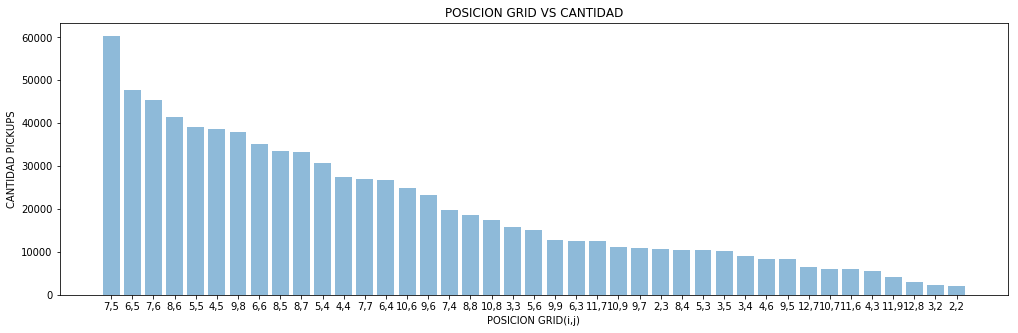

In [19]:
tmp = data_january_manhattan.copy()
tmp['cantidad'] = 1
pickups_place = tmp.groupby('pickups_place').agg({'cantidad': sum})
pickups_place = pickups_place[pickups_place['cantidad'].values > MAXIMO]
pickups_place.sort_values('cantidad',  ascending=False, inplace=True)
index = list(pickups_place.index)
values = np.concatenate( pickups_place.values, axis=0).tolist()
x = np.arange(len(index))
plt.figure(figsize=(17,5))
plt.bar(x, values, align='center', alpha=0.5)
plt.xticks(x, index)
plt.ylabel('CANTIDAD PICKUPS')
plt.xlabel('POSICION GRID(i,j)')
plt.title('POSICION GRID VS CANTIDAD')
plt.show()

###  Del top 5 a que grid va normalmente (de pickup a que dropoff va)

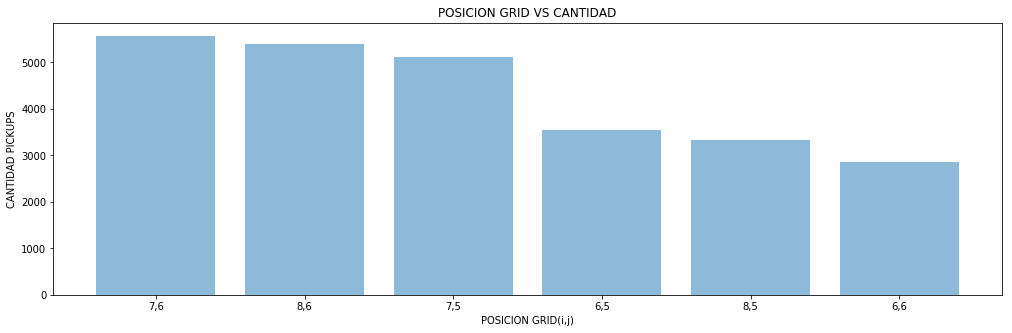

In [22]:
mayor = list(pickups_place.index)[0]
tmp2 = data_january_manhattan.copy()
tmp2 = tmp2[tmp2['pickups_place'] == mayor]
tmp2['cantidad'] = 1
best_grid = tmp2.groupby('dropoff_place').agg({'cantidad': sum})
best_grid = best_grid[best_grid['cantidad'].values > MAXIMO_BEST]
best_grid.sort_values('cantidad',  ascending=False, inplace=True)
index = list(best_grid.index)
values = np.concatenate( best_grid.values, axis=0).tolist()
x = np.arange(len(index))
plt.figure(figsize=(17,5))
plt.bar(x, values, align='center', alpha=0.5)
plt.xticks(x, index)
plt.ylabel('CANTIDAD PICKUPS')
plt.xlabel('POSICION GRID(i,j)')
plt.title('POSICION GRID VS CANTIDAD')
plt.show()

### Average per day (Average per day.py)

## Variance per day (los dos archivos variance)

## Objetivo: Ver si existe relacion entre la forma que la gente se mueve en taxi y el ingreso de dolares al lugar

### Clustering

* a que queremos llegar con este metodo 
* porque escogimos un metodo de clustering
* a que conclusion llegamos
* diagrama de clustering en r graficos (http://uc-r.github.io/kmeans_clustering)